# -------- DIWALI SALES ANALYSIS ------------

-> performed data cleaning and manipulation.

-> performed exploratory data analysis using
pandas,numpy,matlpotlib and seaborn.

-> Retrieved meaningful insights and trends.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\prade\Downloads\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali.csv',encoding='unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [50]:
df.shape

(11251, 15)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [53]:
df=df.drop(["Status","unnamed1"],axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [56]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [57]:
df['Amount'].median()

8109.0

In [59]:
df['Amount']=df['Amount'].fillna(df['Amount'].median())

In [60]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [61]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176734
std,1.716125e+03,12.754122,0.493632,1.115047,5219.754408
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [68]:
q1 = np.percentile(df['Amount'],25)
q2 = np.percentile(df['Amount'],50)
q3 = np.percentile(df['Amount'],75)

iqr = q3 - q1
lower_fence = q1 - (iqr*1.5)
upper_fence = q3 +  (iqr*1.5)
lower_fence,upper_fence
df['Amount'] = np.where(((df['Amount']<lower_fence)|(df['Amount']>upper_fence)),q2,df['Amount'])

In [70]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9421.643093
std,1.716125e+03,12.754122,0.493632,1.115047,5181.704238
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12618.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23462.000000


In [72]:
df['Amount']=df['Amount'].astype('int')

In [73]:
df['Amount'].dtypes

dtype('int32')

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## visualiz

### gender

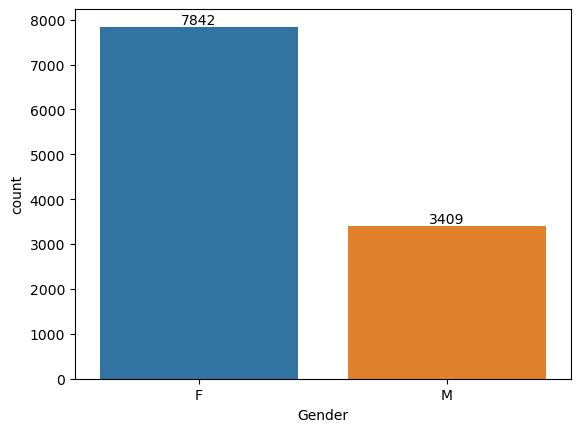

In [77]:
aa=sns.countplot(x='Gender',data=df)

for bars in aa.containers:
    aa.bar_label(bars)

In [83]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74214041
1,M,31788863


<Axes: xlabel='Gender', ylabel='Amount'>

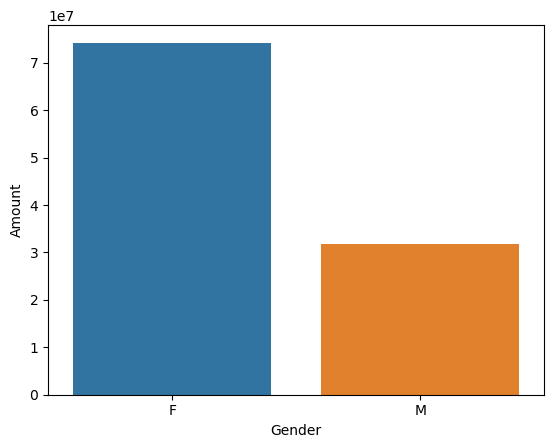

In [84]:
sales_by_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_by_gender)

from above graphs we can see that most of the buyers are females and even the purchasing power of females are greater then men

### age

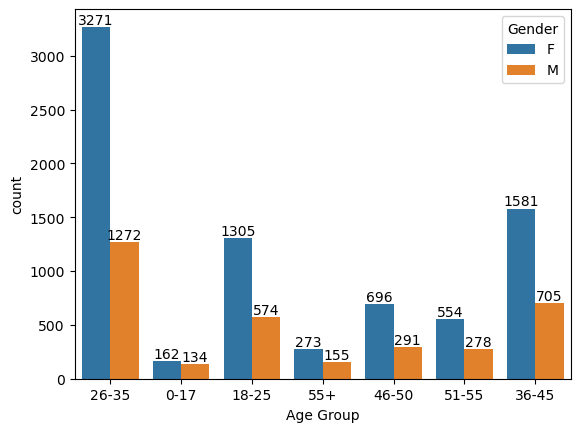

In [86]:
age =sns.countplot(data =df,x='Age Group',hue='Gender')

for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

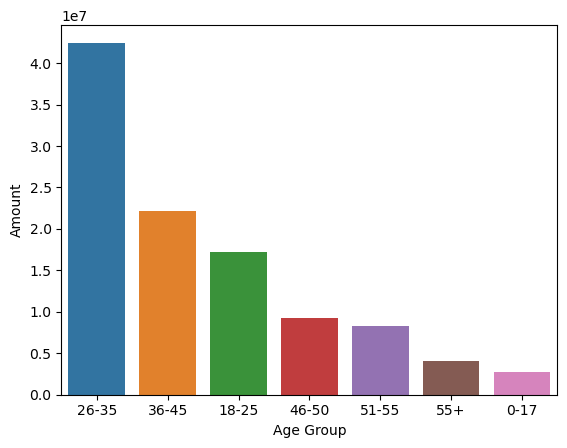

In [89]:
sales_by_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_by_age)

from above graphs we can see that most of the buyers are of age group between 26-35 year

### state

<Axes: xlabel='State', ylabel='Orders'>

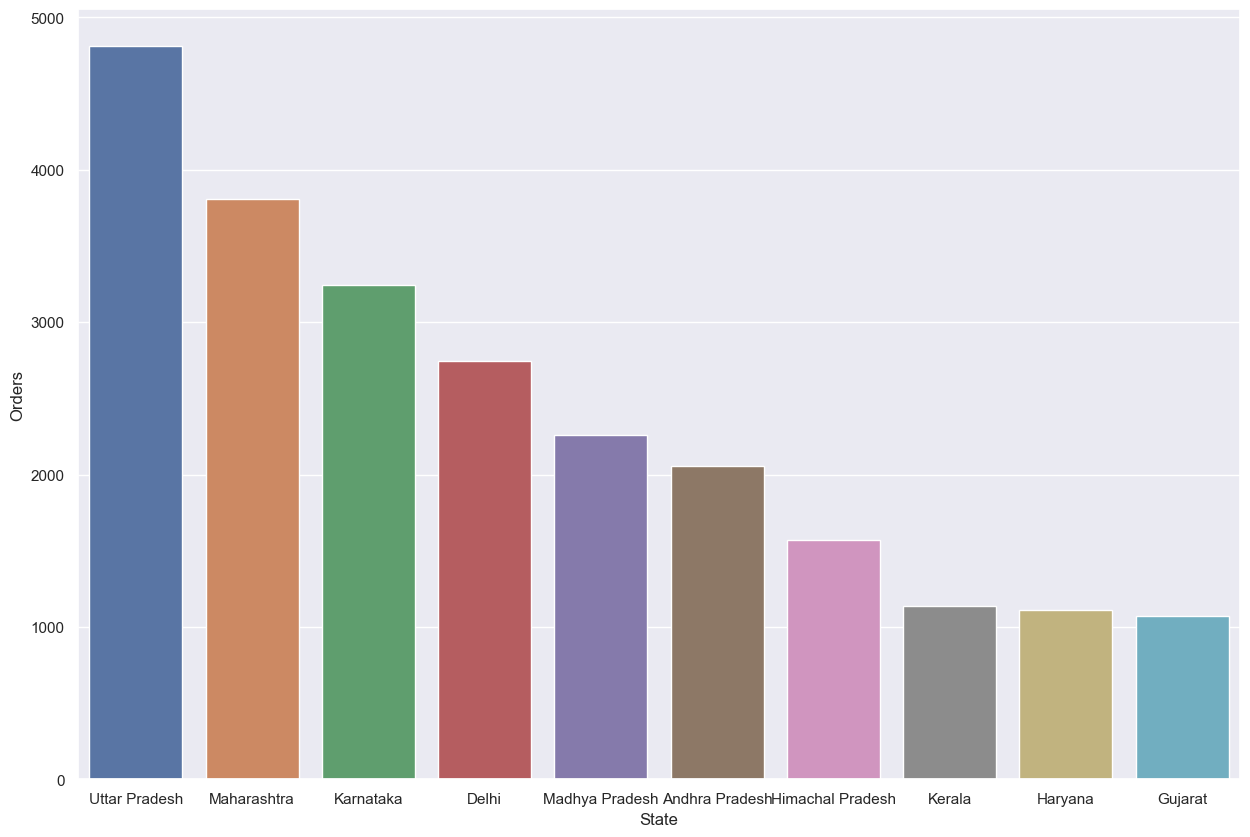

In [98]:
orders_by_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=orders_by_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

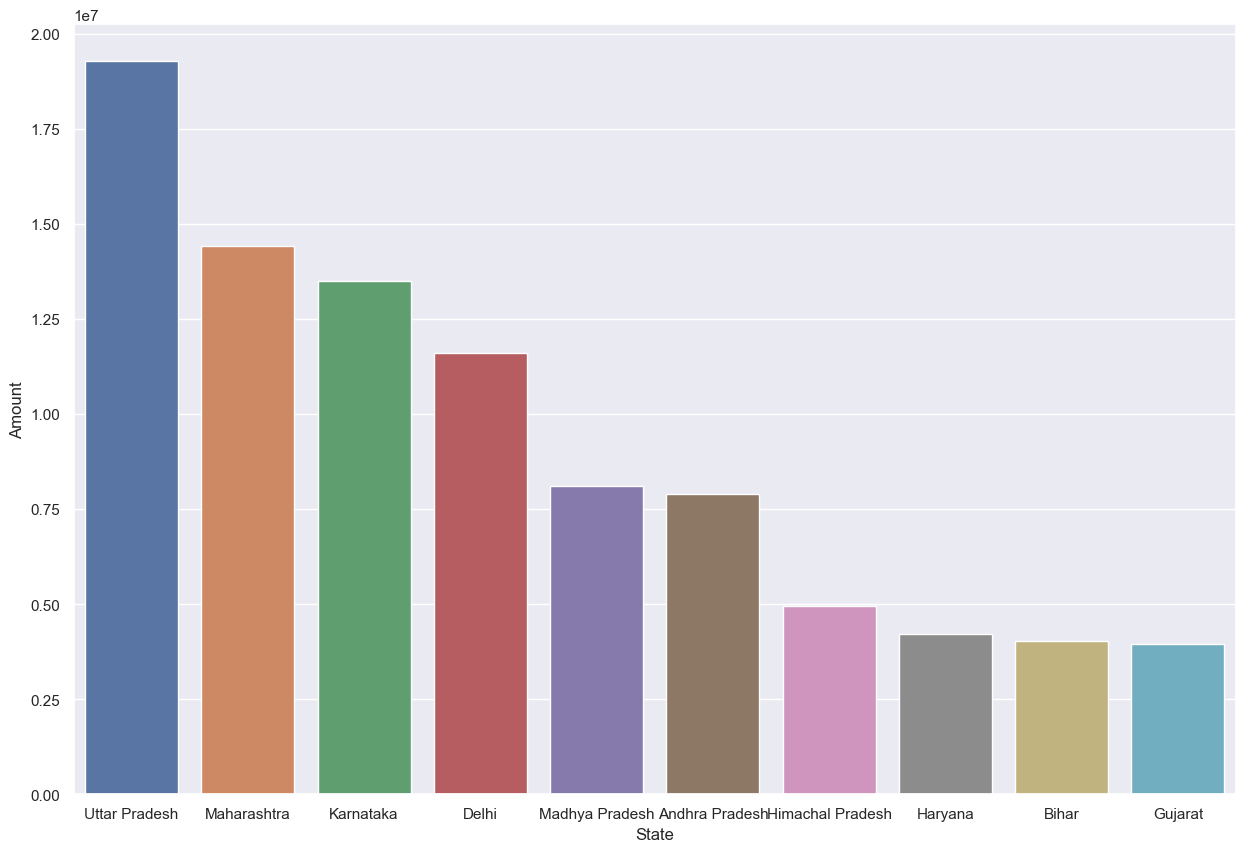

In [99]:
sales_by_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data=sales_by_state,x='State',y='Amount')

### marital status

aa=sns.countplot(data=df,x='Marital_Status')

sns.set(rc={'figure.figsize':(1,5)})
for bars in aa.containers:
    aa.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

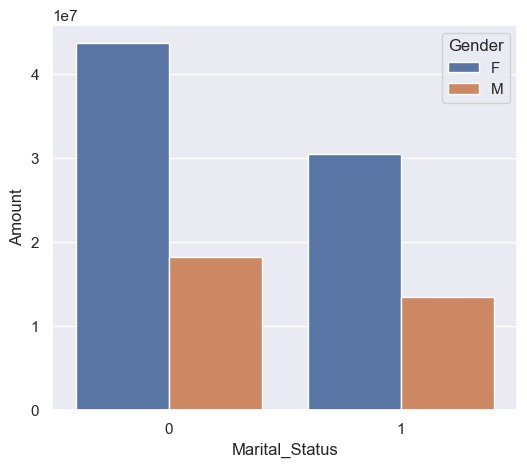

In [101]:
sales_by_marital_status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_by_marital_status,x='Marital_Status',y='Amount',hue='Gender')

from above graphs we can see that most of the buyers married (women) and they have high purchasing power

### product category

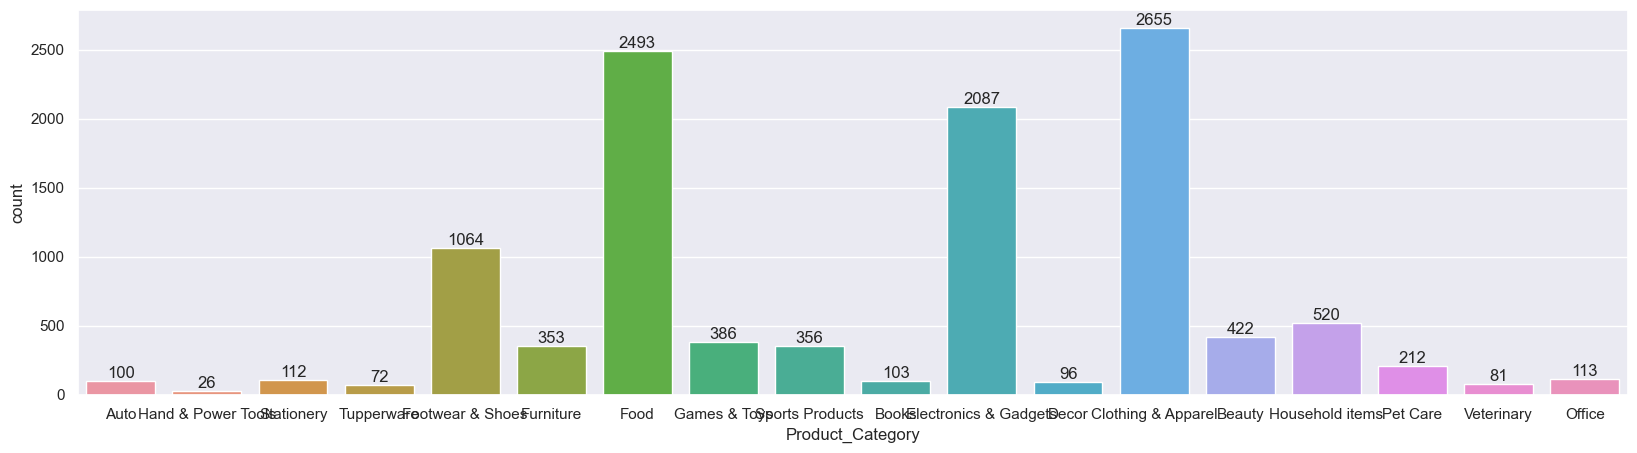

In [102]:
sns.set (rc={'figure.figsize':(20,5)})
aa=sns.countplot(data=df,x='Product_Category')

for bars in aa.containers:
    aa.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

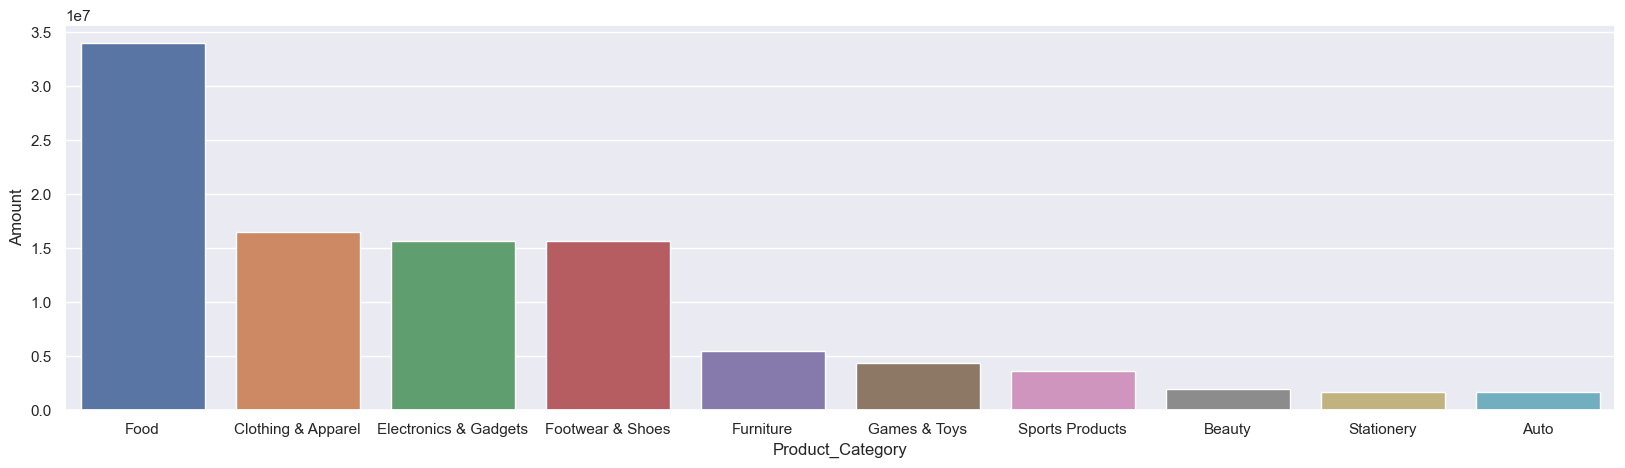

In [103]:
sales_by_category=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_by_category,x='Product_Category',y='Amount')

from above graphs we can see that most of the sold products are clothes by orders but food by amount

<Axes: xlabel='Product_ID', ylabel='Orders'>

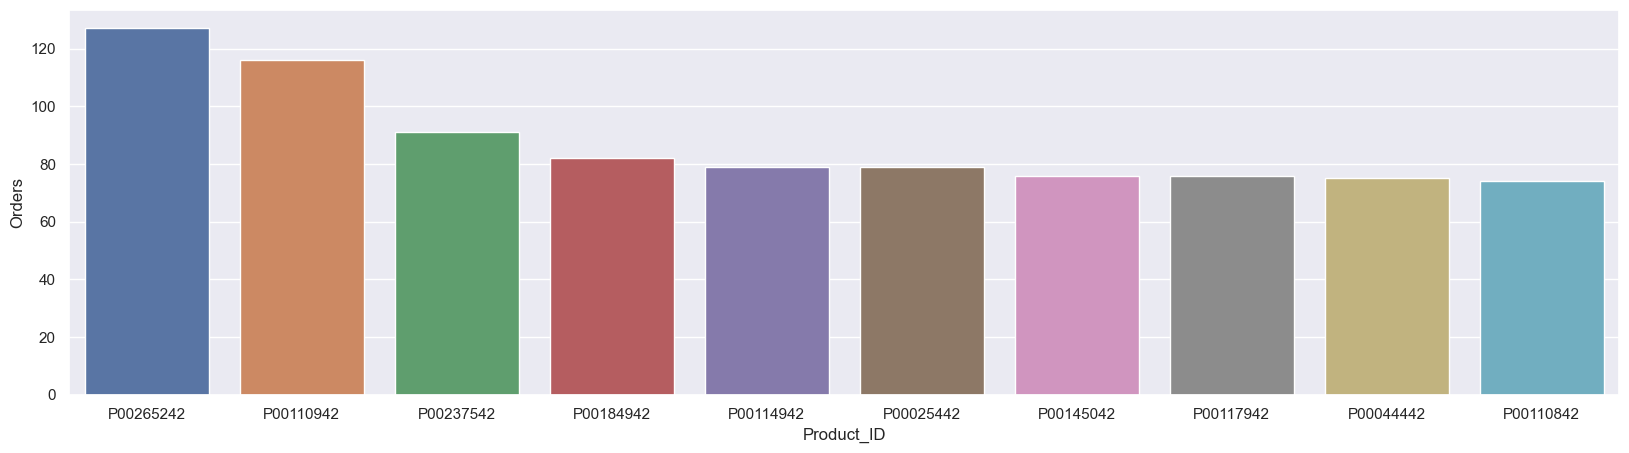

In [7]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

## conclusion:- 

Married women age group 26-35 year from UP,Maharastra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products from Food 
Clothing and Electronics Category